In [2]:
from impedance import preprocessing
import numpy as np


# Use a raw string (r"...") for the file path
file_path = r"C:\Users\gagni\Desktop\PLD\EIS\250217_YSZ_Si_at400\YSZ_Si_at400C_IP_50mV_6V_218Ohm_C01.csv"

# Load frequencies and impedance (Z) from the CSV file
frequencies, Z = preprocessing.readCSV(file_path)

#Change the sign of the imaginary part
Z  = Z.real - 1j * Z.imag  # This flips the sign of the imaginary part

# keep only the impedance data in the first quandrant
frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)

For this dataset which simply contains impedance data in three columns (frequency, Z_real, Z_imag)

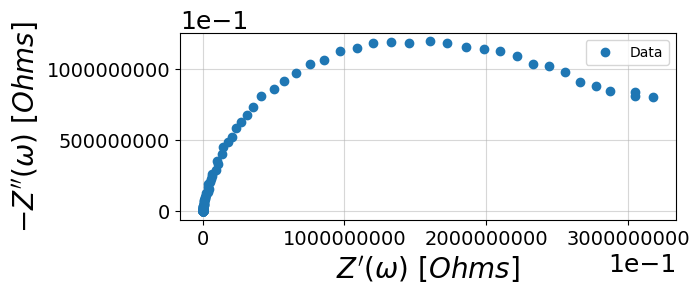

In [3]:
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist

fig, ax = plt.subplots()
plot_nyquist(Z, fmt='o', scale=10, ax=ax)

plt.legend(['Data'])
plt.show()

In [59]:
from impedance.models.circuits import CustomCircuit

# https://impedancepy.readthedocs.io/en/latest/circuit-elements.html

#circuit = 'p(C1,(R1-p(R2,C2))'
circuit = 'R0-p(R1,CPE1)-p(R2,CPE2)'
initial_guess = [8.823E+01, 1.882E+02, 1.005E-07, 7.354E-03, 2.801E+08, 8.581E-09, 8.196E-02]
#initial_guess = [1e-10,5e9,5e9, 1e-10]

circuit = CustomCircuit(circuit, initial_guess=initial_guess)
circuit.fit(frequencies, Z)
Z_fit = circuit.predict(frequencies)


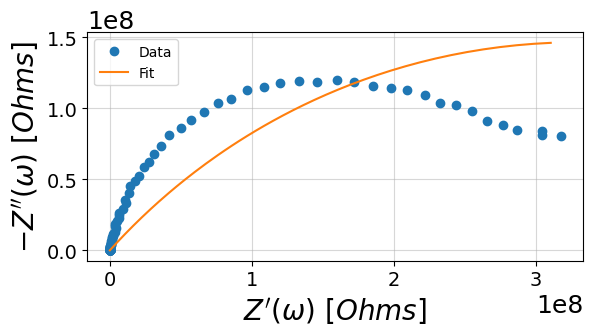

In [60]:
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist

fig, ax = plt.subplots()
plot_nyquist(Z, fmt='o', scale=10, ax=ax)
plot_nyquist(Z_fit, fmt='-', scale=10, ax=ax)

plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.legend(['Data', 'Fit'])
plt.show()

## Vizualize

In [57]:
import warnings
warnings.filterwarnings("ignore")

circuit.plot(f_data=frequencies, Z_data=Z)

alt.HConcatChart(...)

In [58]:
circuit.fit(frequencies, Z)

print(circuit)

from impedance.models.circuits.fitting import rmse
print('RMSE((Z_fit,Z): ', rmse(Z_fit,Z))


Circuit string: R0-p(R1,CPE1)-p(R2,CPE2)
Fit: True

Initial guesses:
     R0 = 8.82e+01 [Ohm]
     R1 = 1.88e+02 [Ohm]
  CPE1_0 = 1.01e-08 [Ohm^-1 sec^a]
  CPE1_1 = 7.35e-03 []
     R2 = 2.80e+08 [Ohm]
  CPE2_0 = 8.58e-09 [Ohm^-1 sec^a]
  CPE2_1 = 8.20e-02 []

Fit parameters:
     R0 = 1.71e+04  (+/- 2.04e-11) [Ohm]
     R1 = 1.20e+06  (+/- 4.66e-12) [Ohm]
  CPE1_0 = 5.48e+02  (+/- 5.42e-19) [Ohm^-1 sec^a]
  CPE1_1 = 8.60e-01  (+/- 1.07e-12) []
     R2 = 3.26e+08  (+/- 8.15e-12) [Ohm]
  CPE2_0 = 7.93e-09  (+/- 1.58e-10) [Ohm^-1 sec^a]
  CPE2_1 = 8.45e-01  (+/- 4.88e-03) []

RMSE((Z_fit,Z):  5802280.838978106


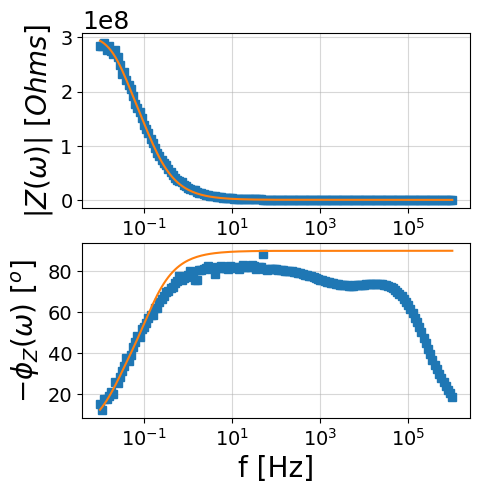

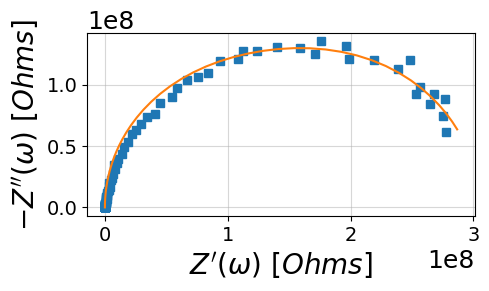

In [299]:
n = 'nyquist'
b = 'bode'

circuit.plot(f_data=frequencies, Z_data=Z, kind=b)    #Bode
circuit.plot(f_data=frequencies, Z_data=Z, kind=n)    
plt.show()

In [300]:
print('RMSE((Z_fit,Z): ', rmse(Z_fit.real,Z.real))

RMSE((Z_fit,Z):  3023766.1281655487


Fitting with initial guess [30000.0, 1e-09, 3000000000.0, 10000000.0, 1e-08]


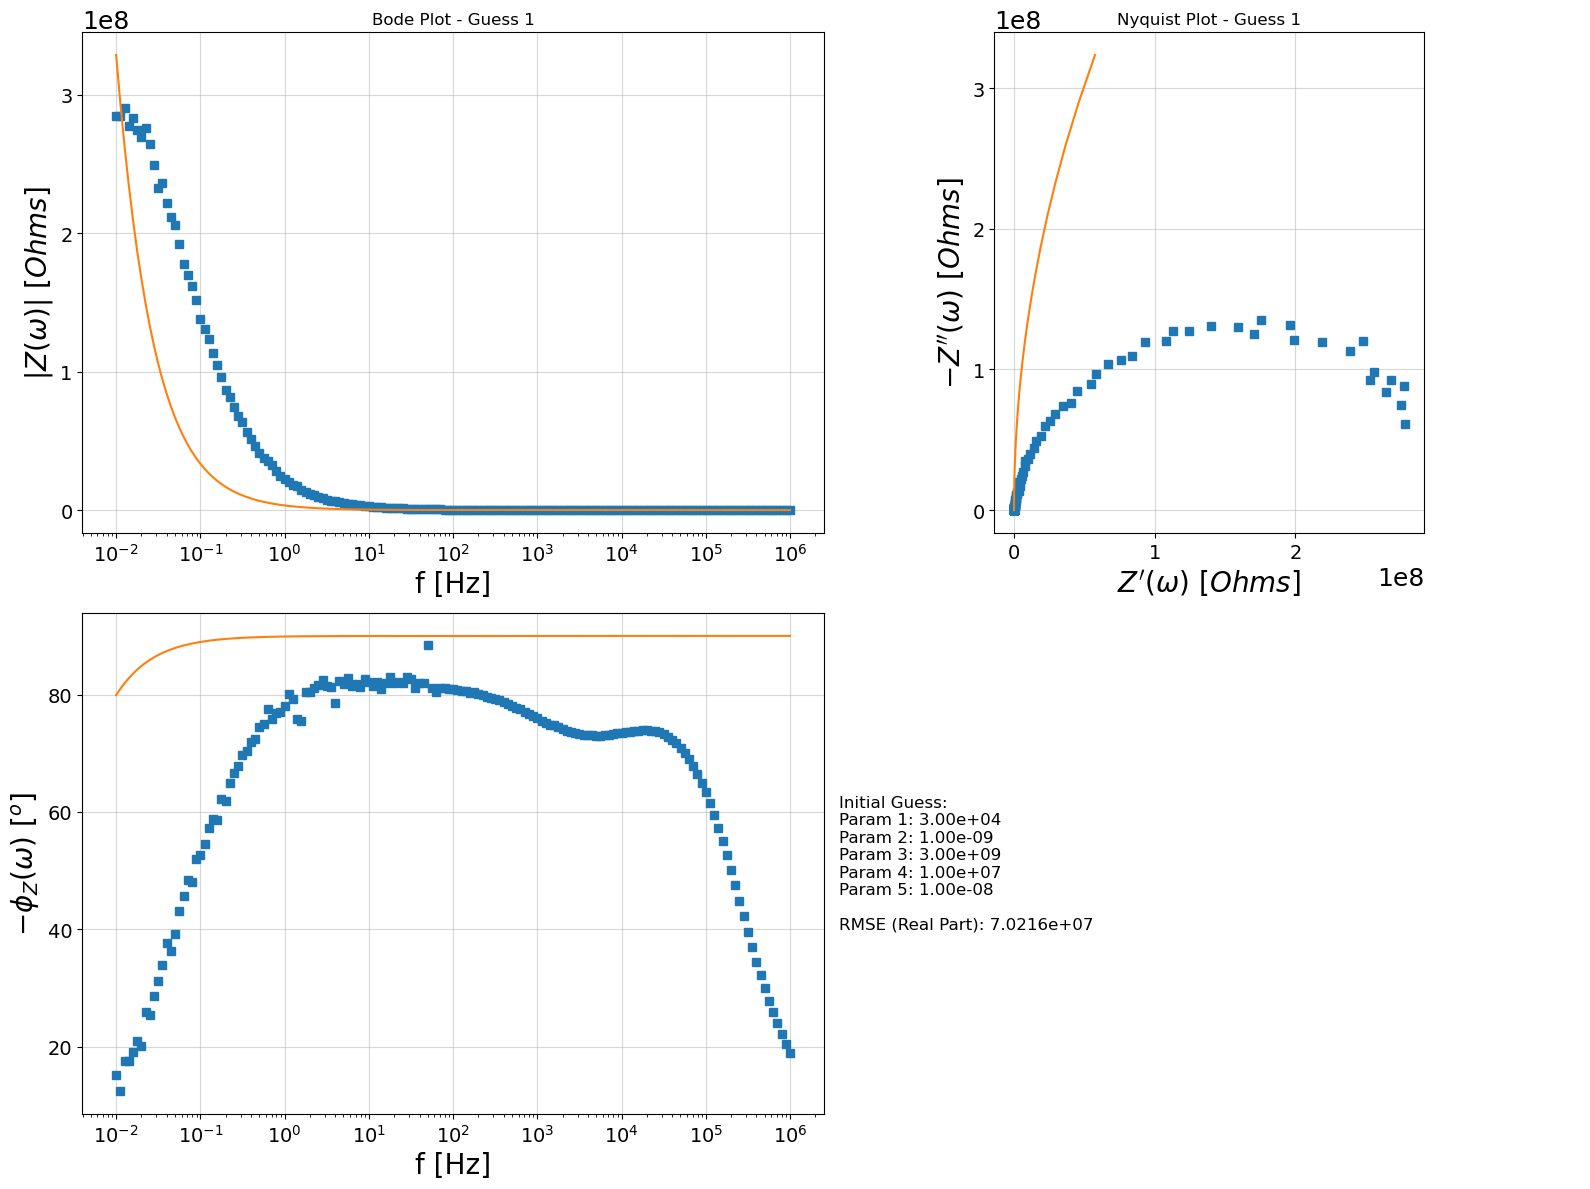

Fitting with initial guess [3000000.0, 1e-09, 3000000000.0, 10000000.0, 1e-08]


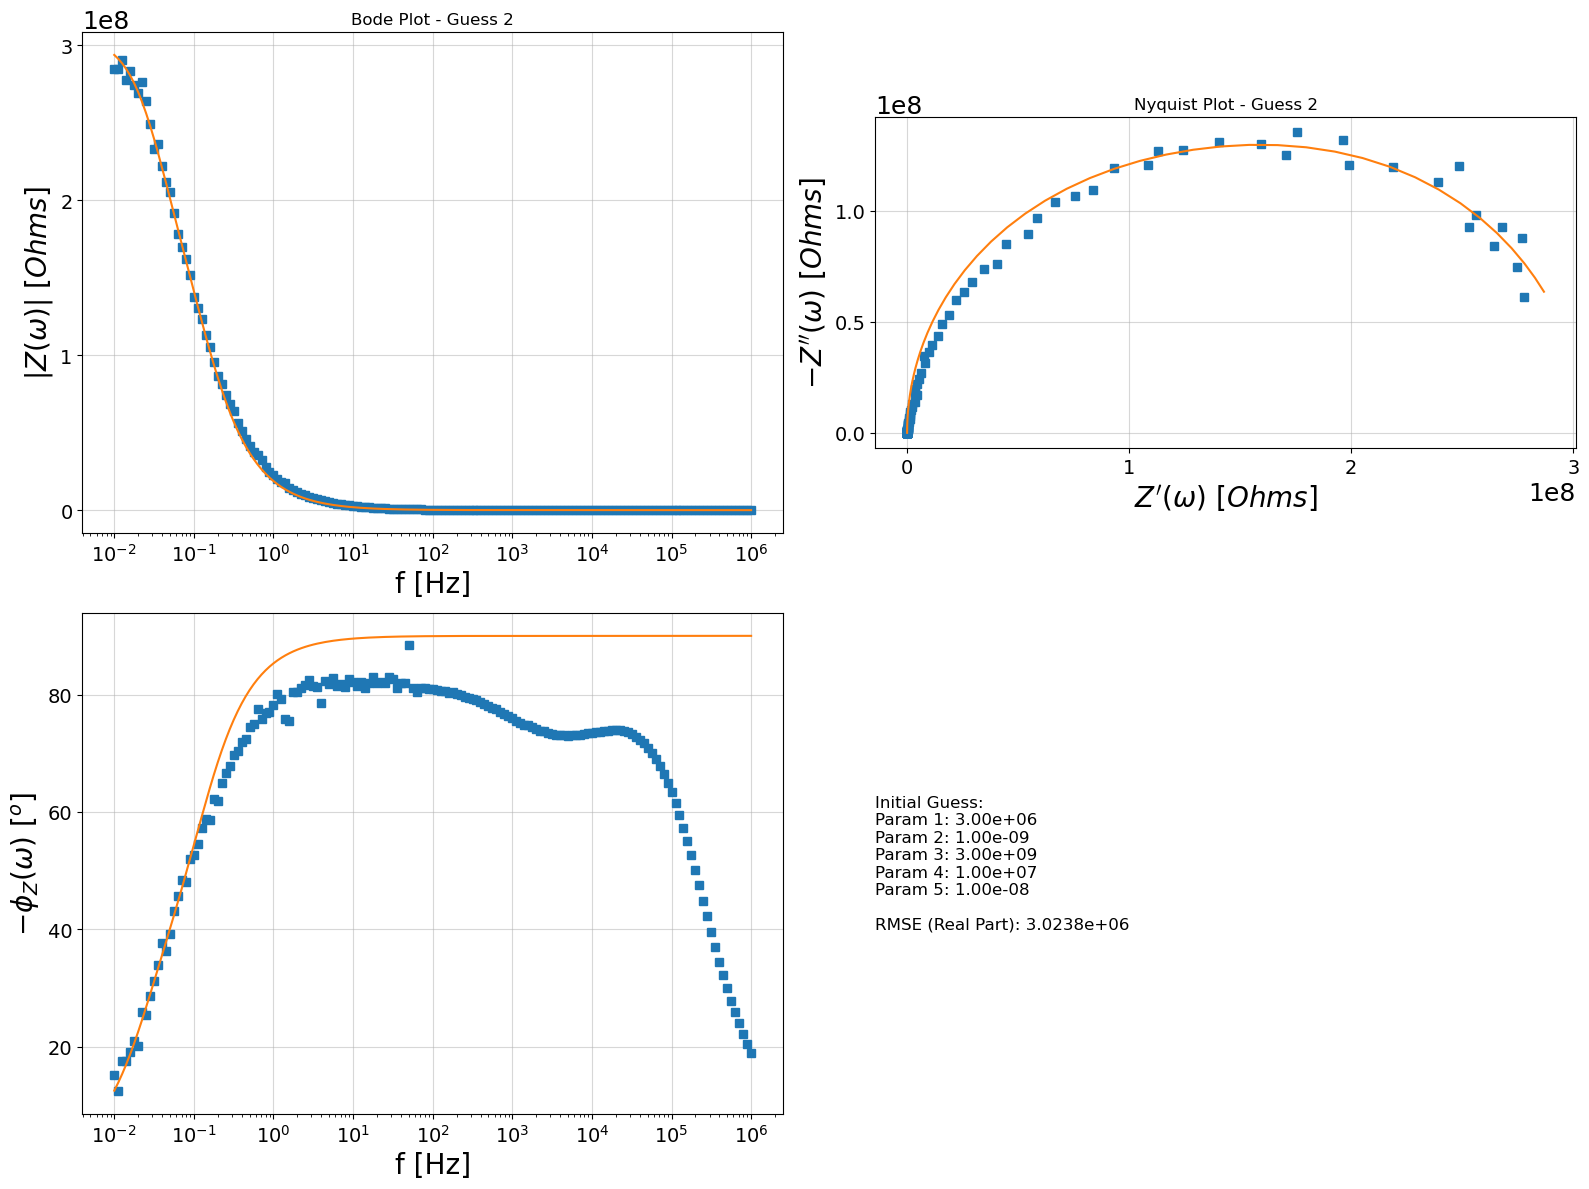

Fitting with initial guess [30000000.0, 1e-09, 3000000000.0, 10000000.0, 1e-08]


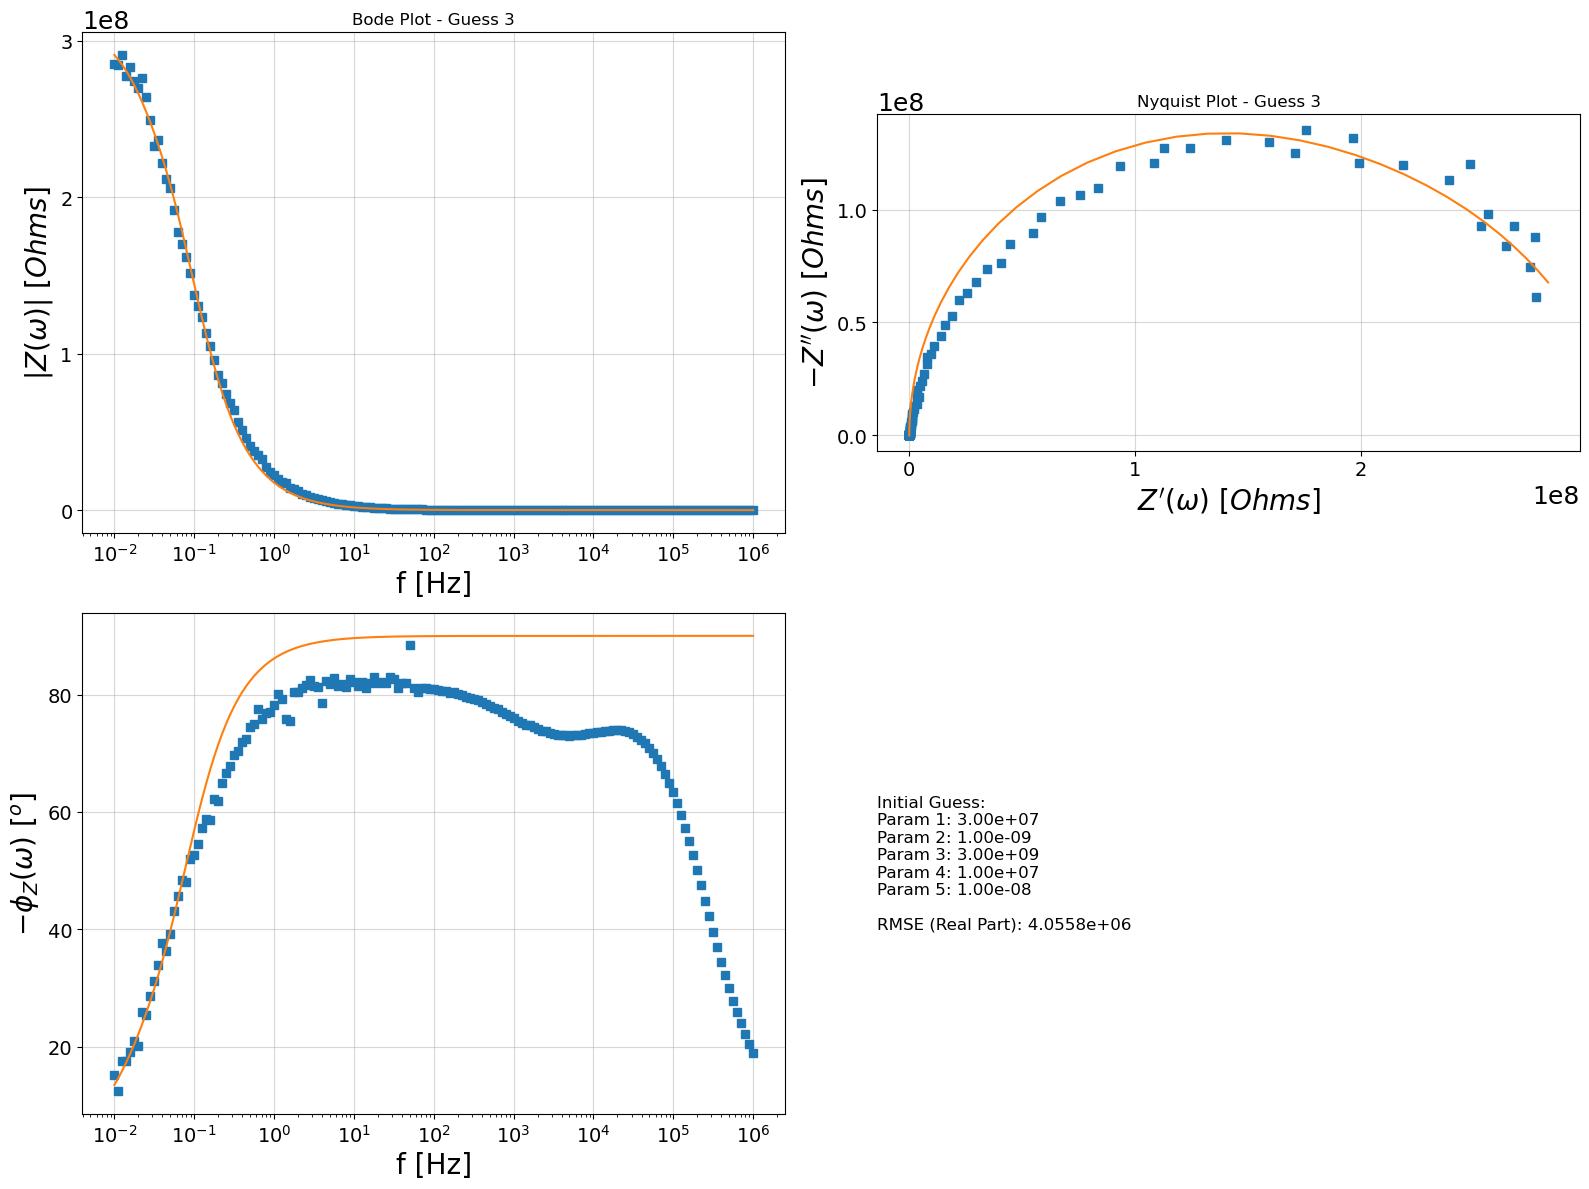

Fitting with initial guess [3000000.0, 1.0000000000000001e-11, 3000000000.0, 10000000.0, 1e-08]


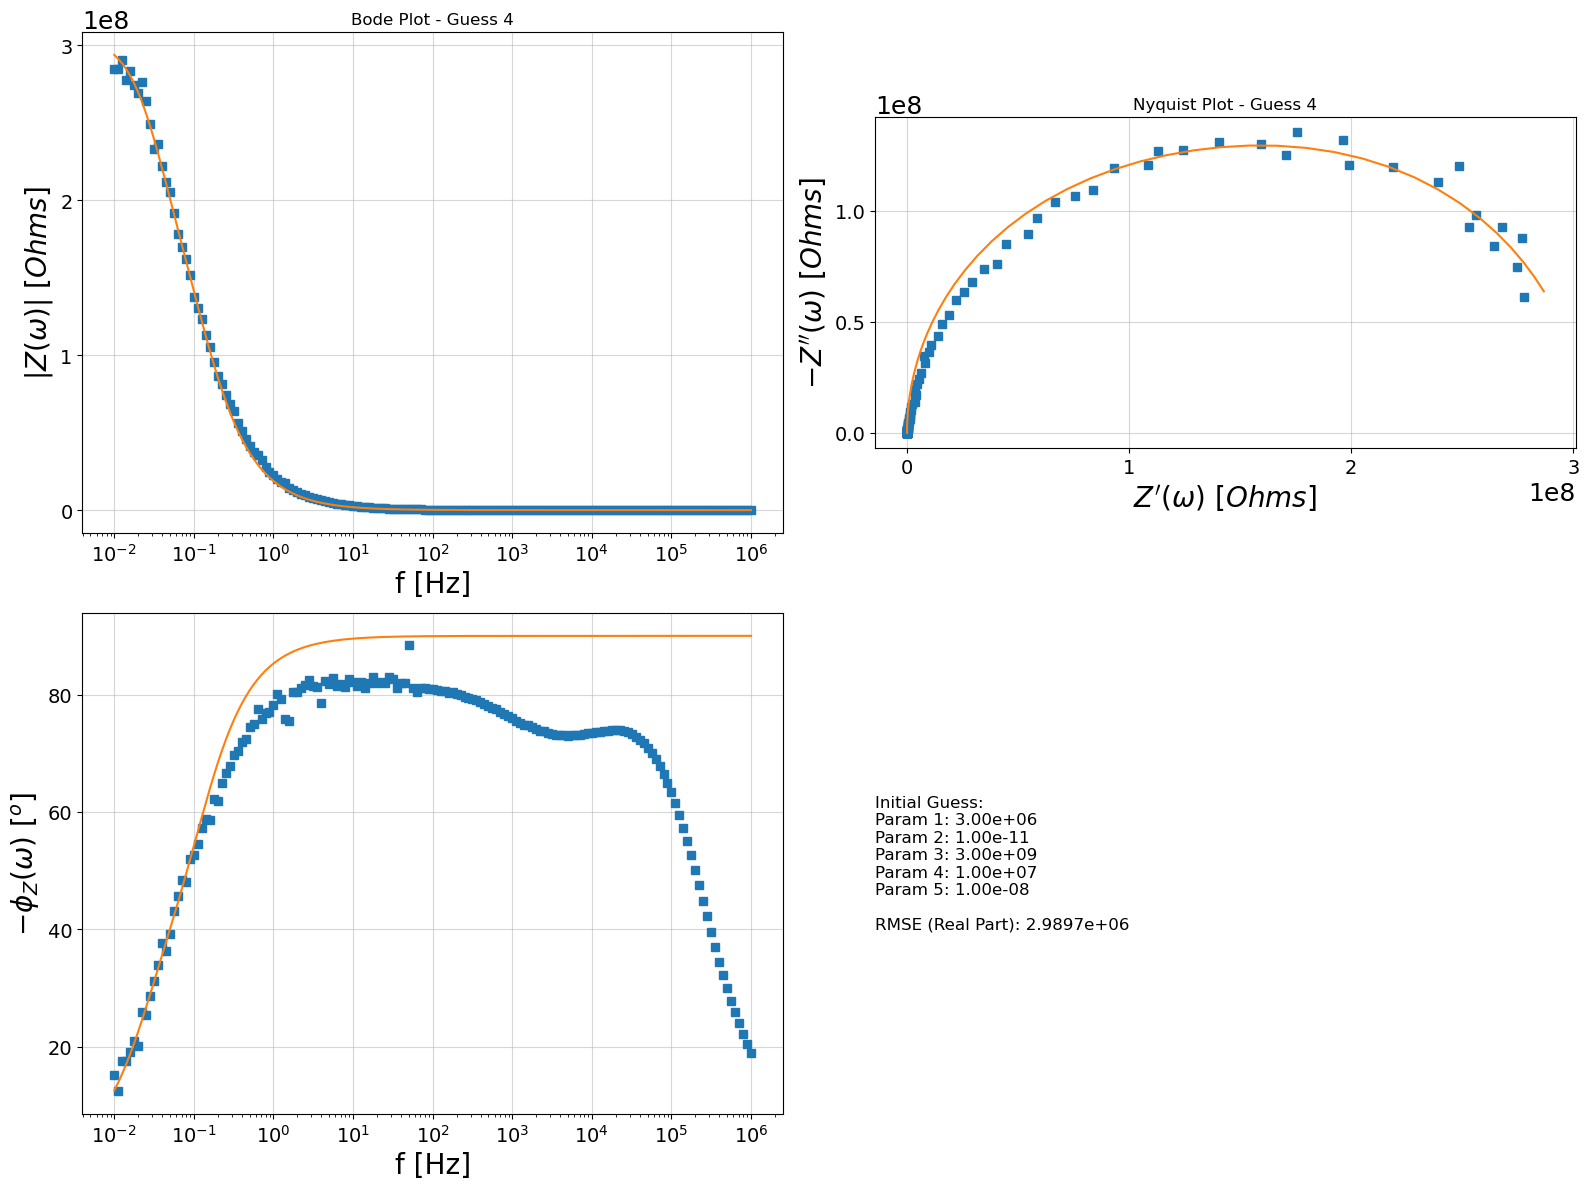

Fitting with initial guess [3000000.0, 1e-09, 3000000000.0, 10000000.0, 1e-08]


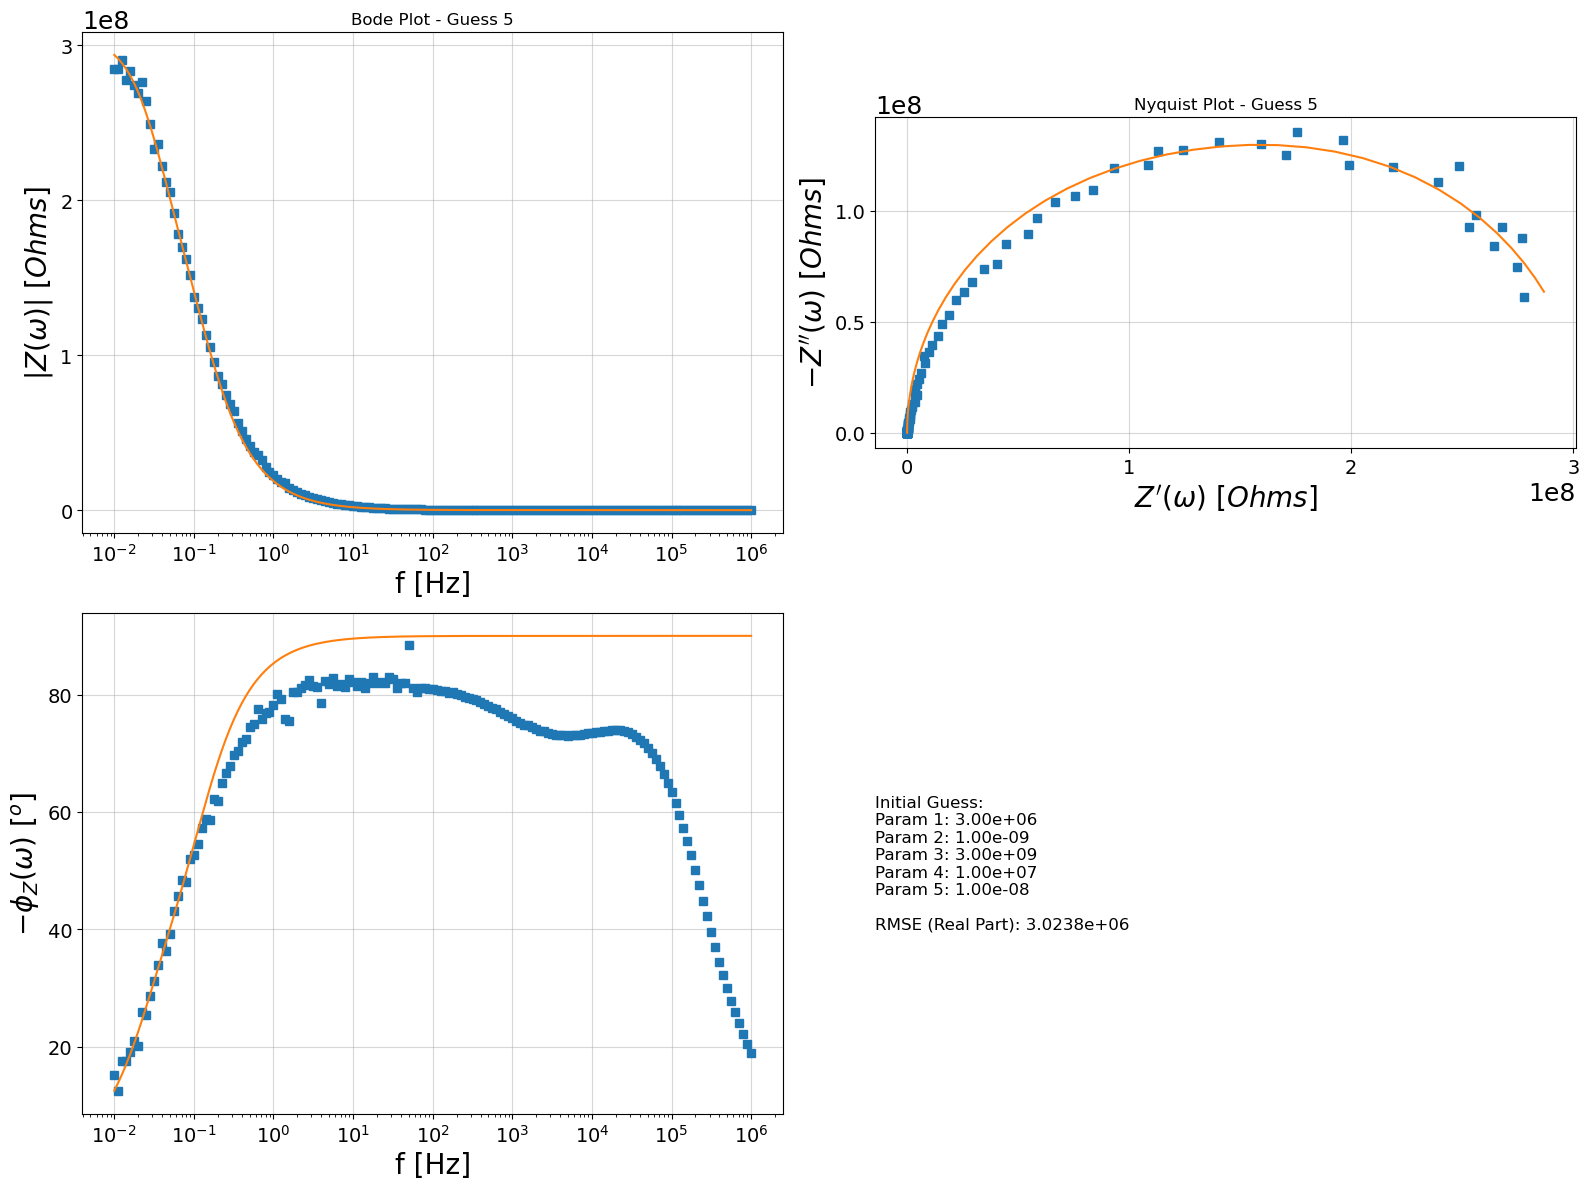

Fitting with initial guess [3000000.0, 1e-08, 3000000000.0, 10000000.0, 1e-08]


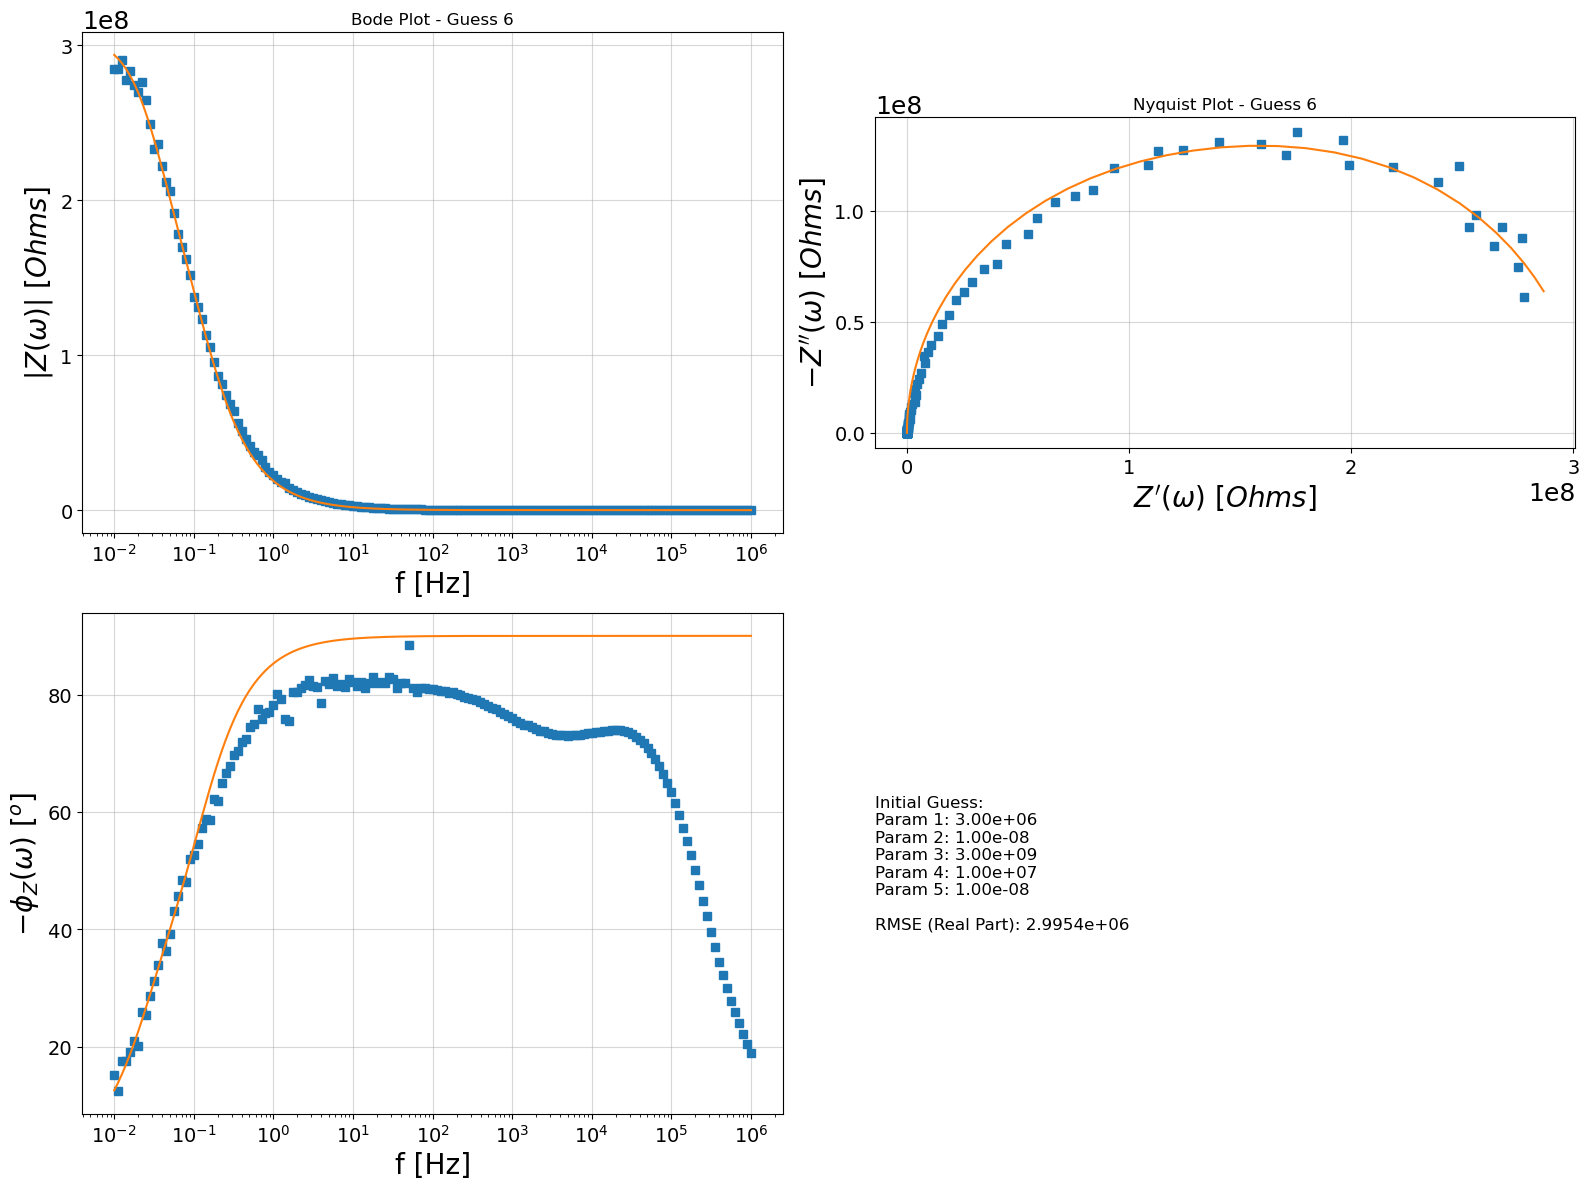

Fitting with initial guess [3000000.0, 1e-09, 30000000.0, 10000000.0, 1e-08]


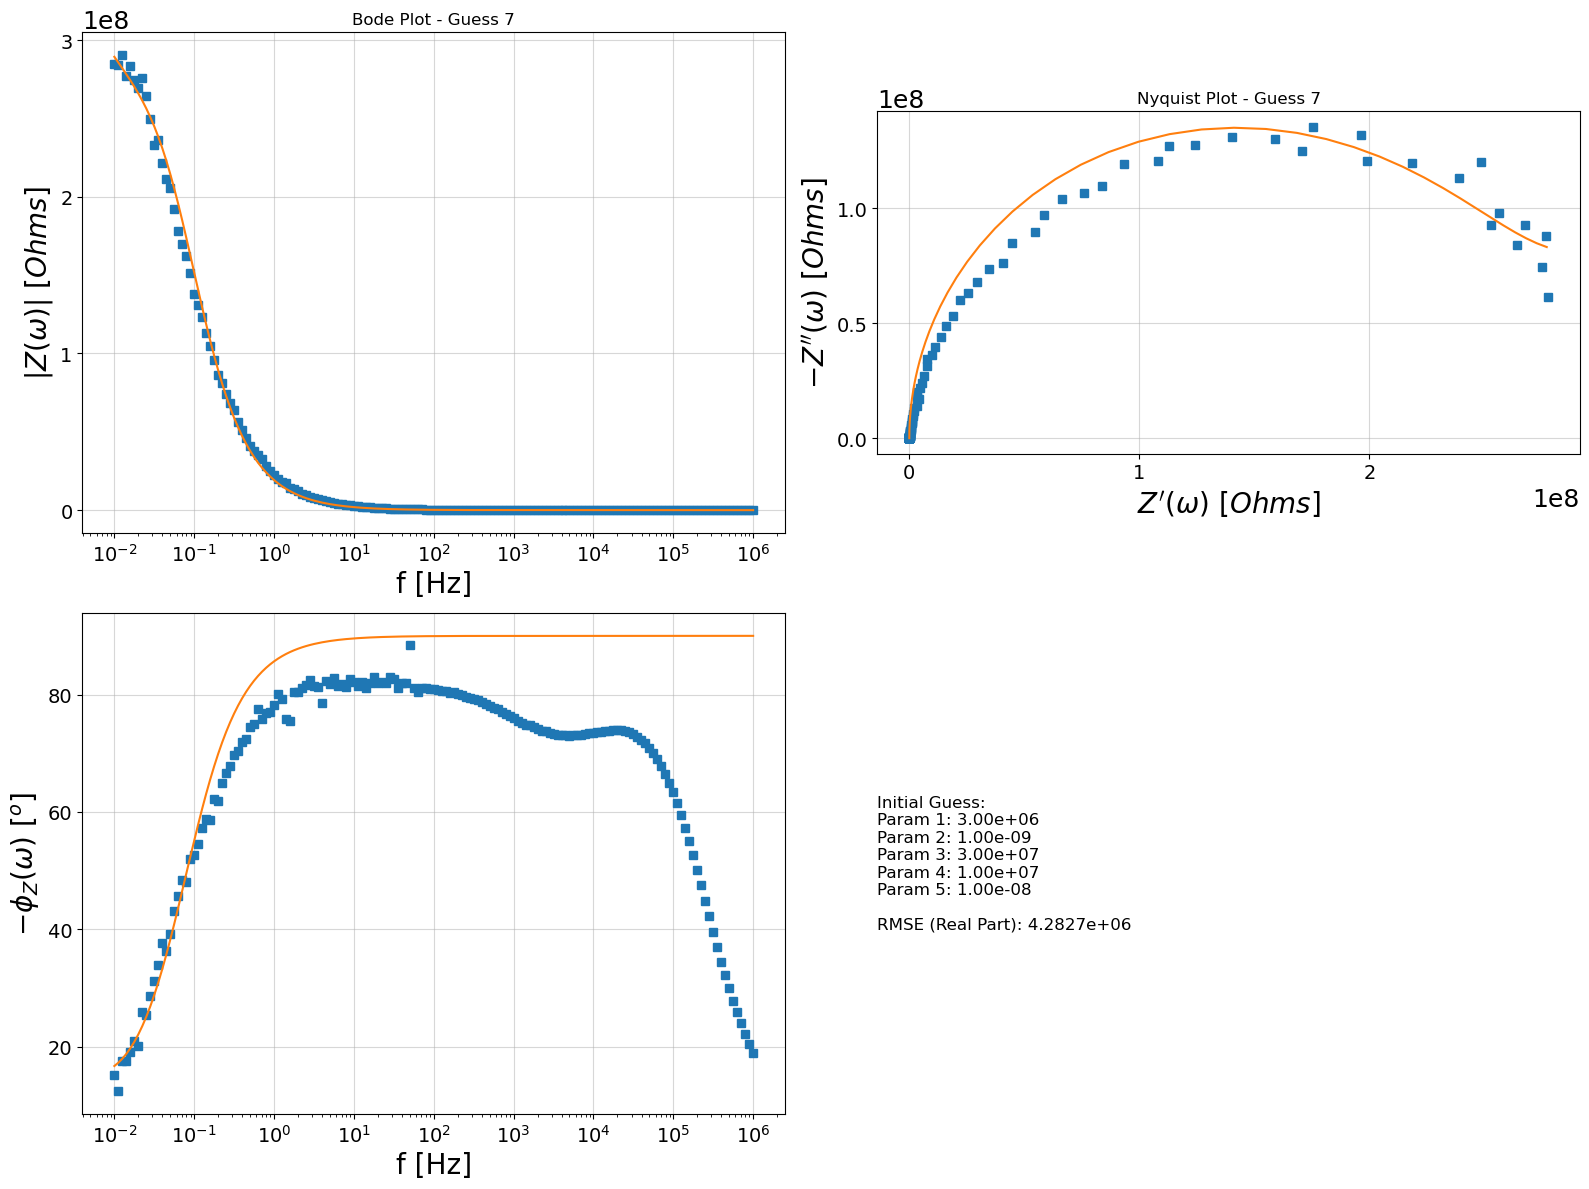

Fitting with initial guess [3000000.0, 1e-09, 3000000000.0, 10000000.0, 1e-08]


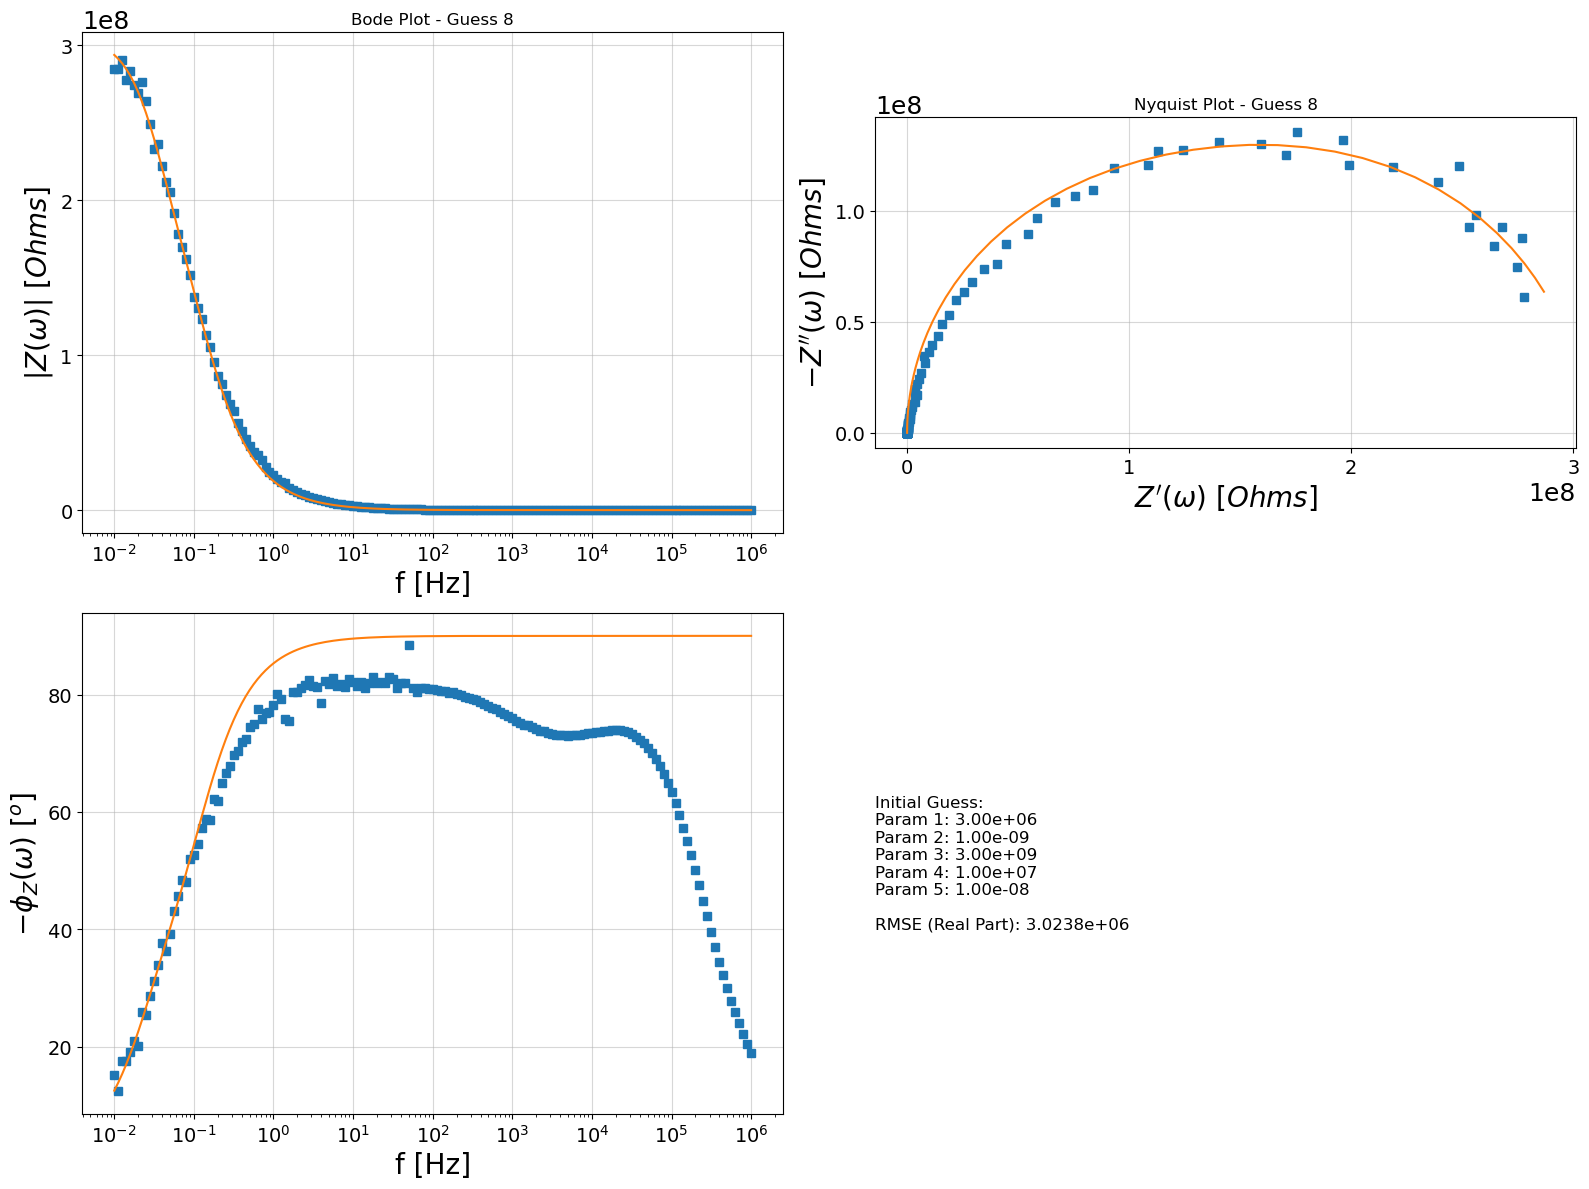

Fitting with initial guess [3000000.0, 1e-09, 30000000000.0, 10000000.0, 1e-08]


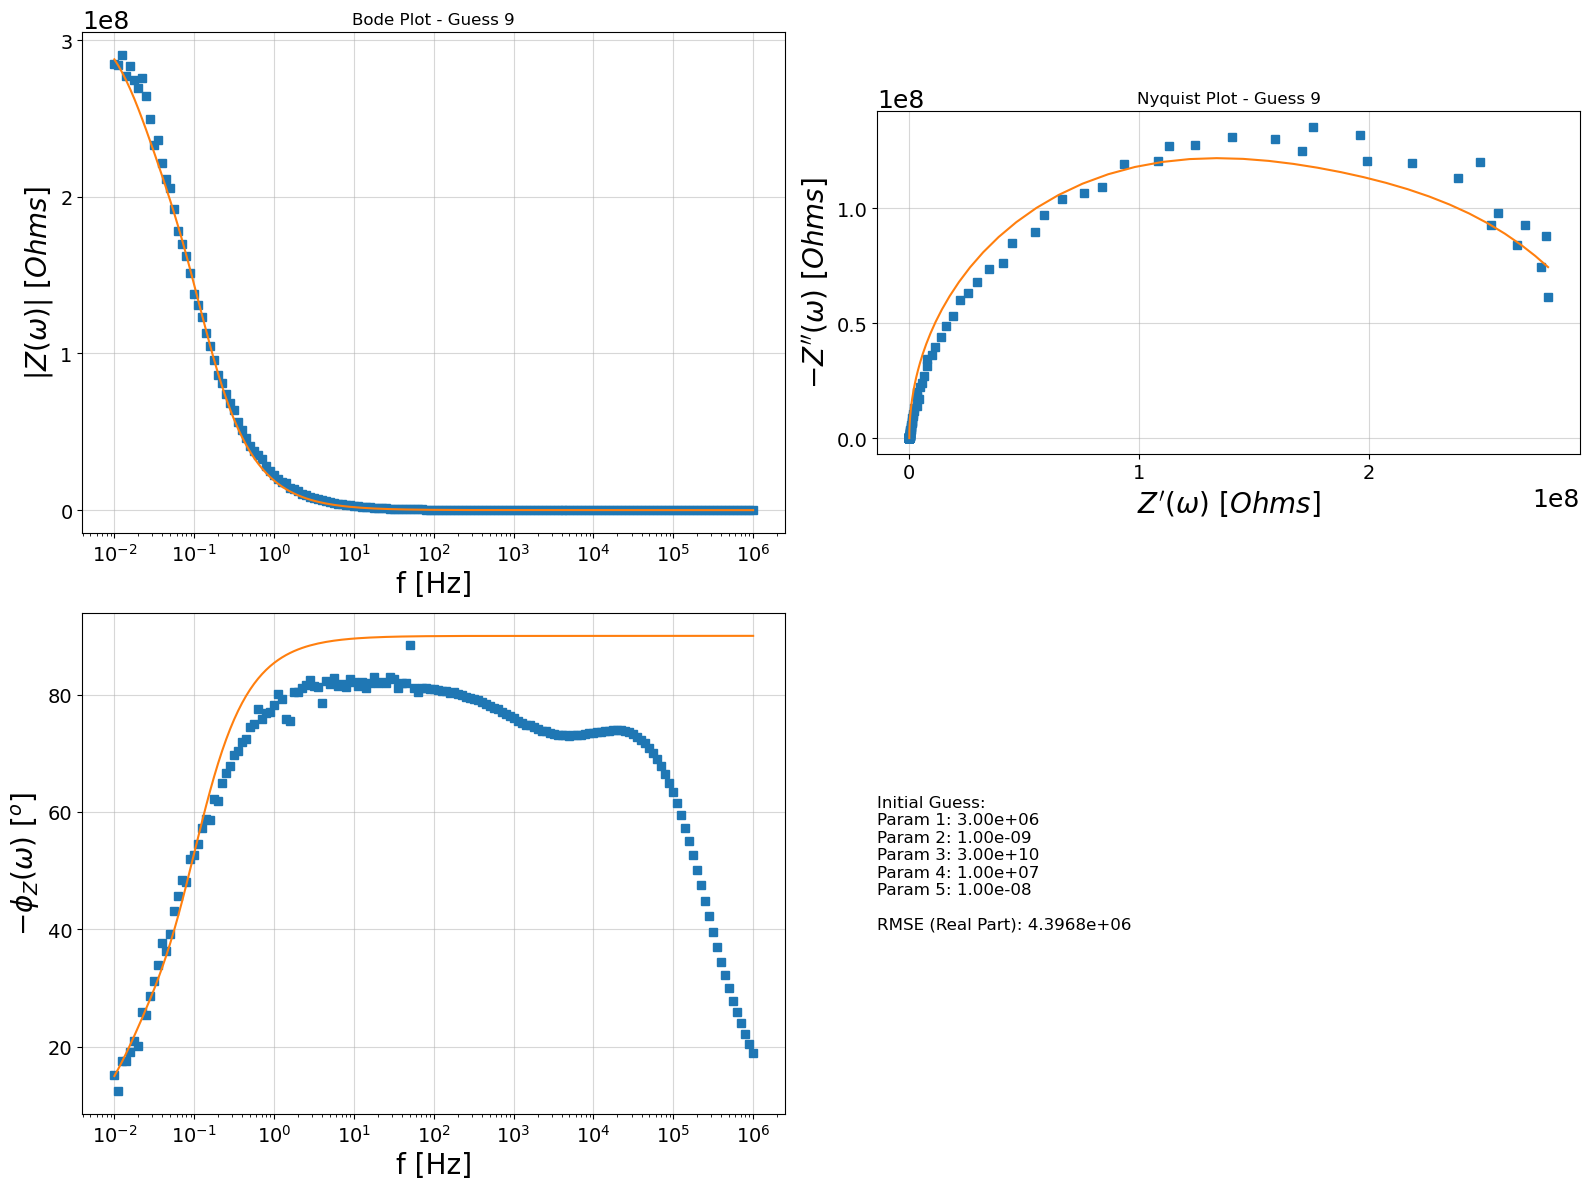

Fitting with initial guess [3000000.0, 1e-09, 3000000000.0, 100000.0, 1e-08]


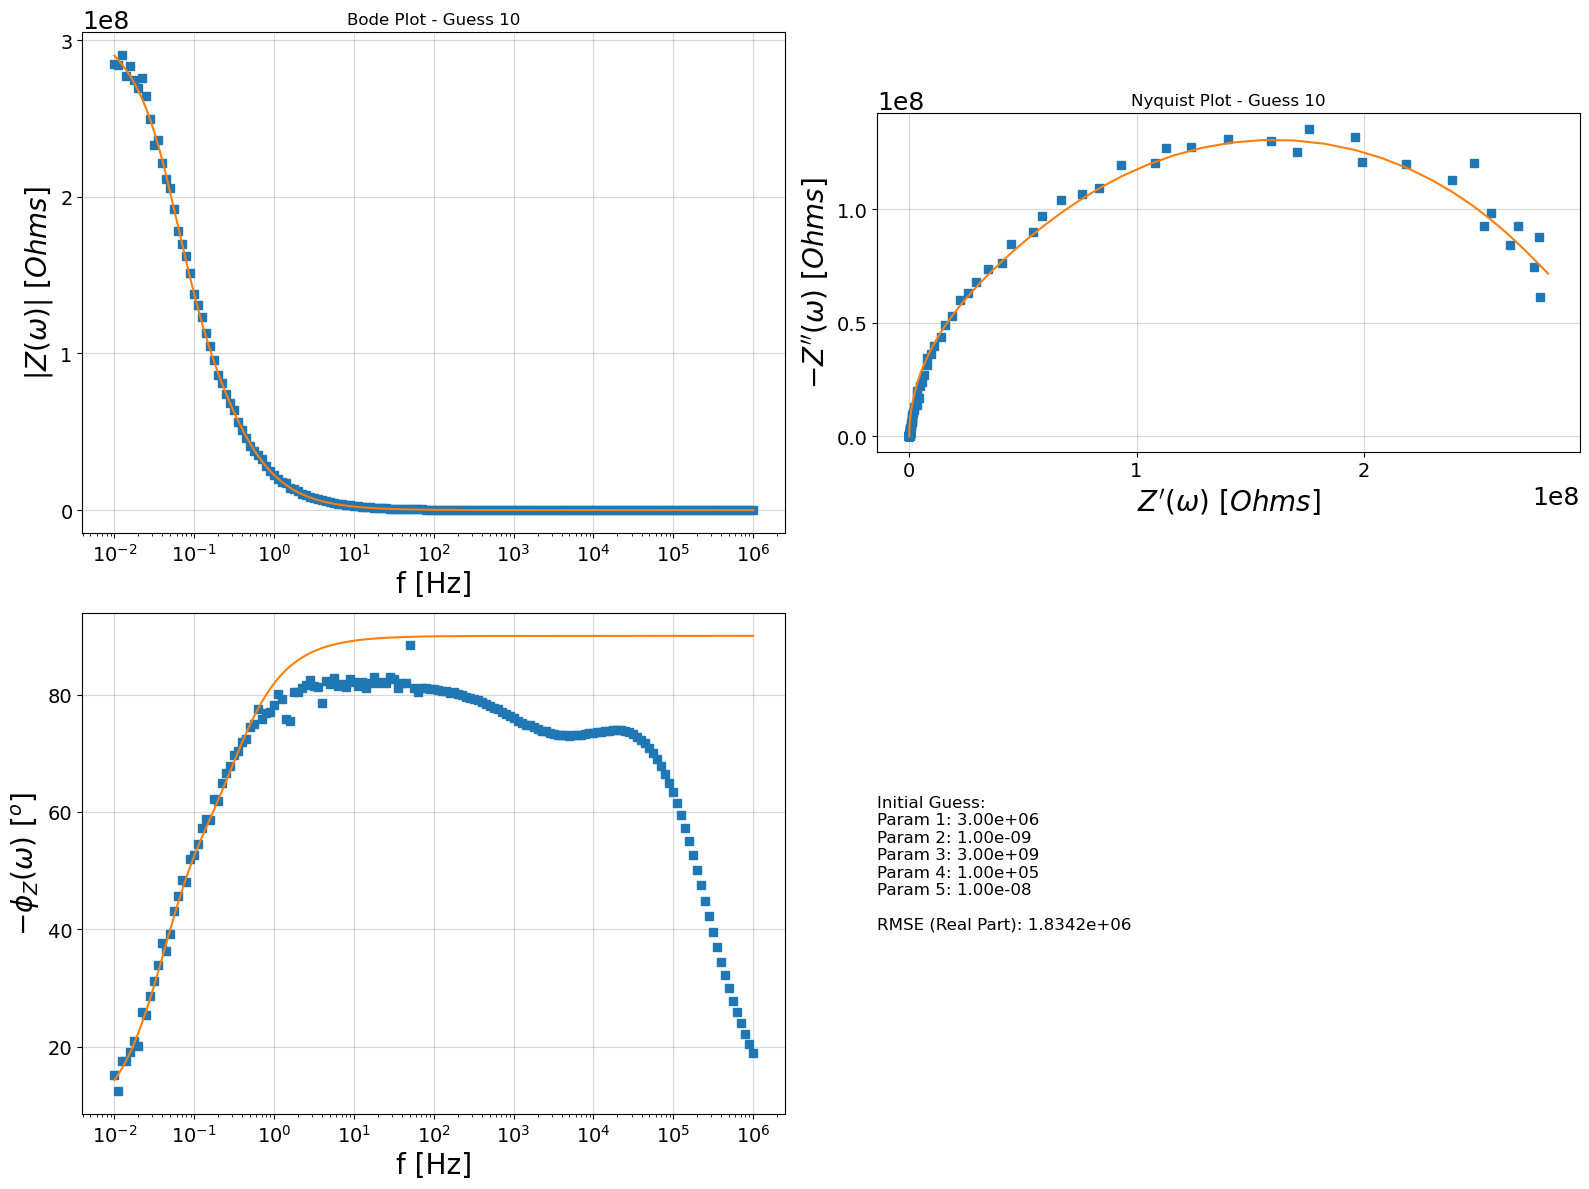

Fitting with initial guess [3000000.0, 1e-09, 3000000000.0, 10000000.0, 1e-08]


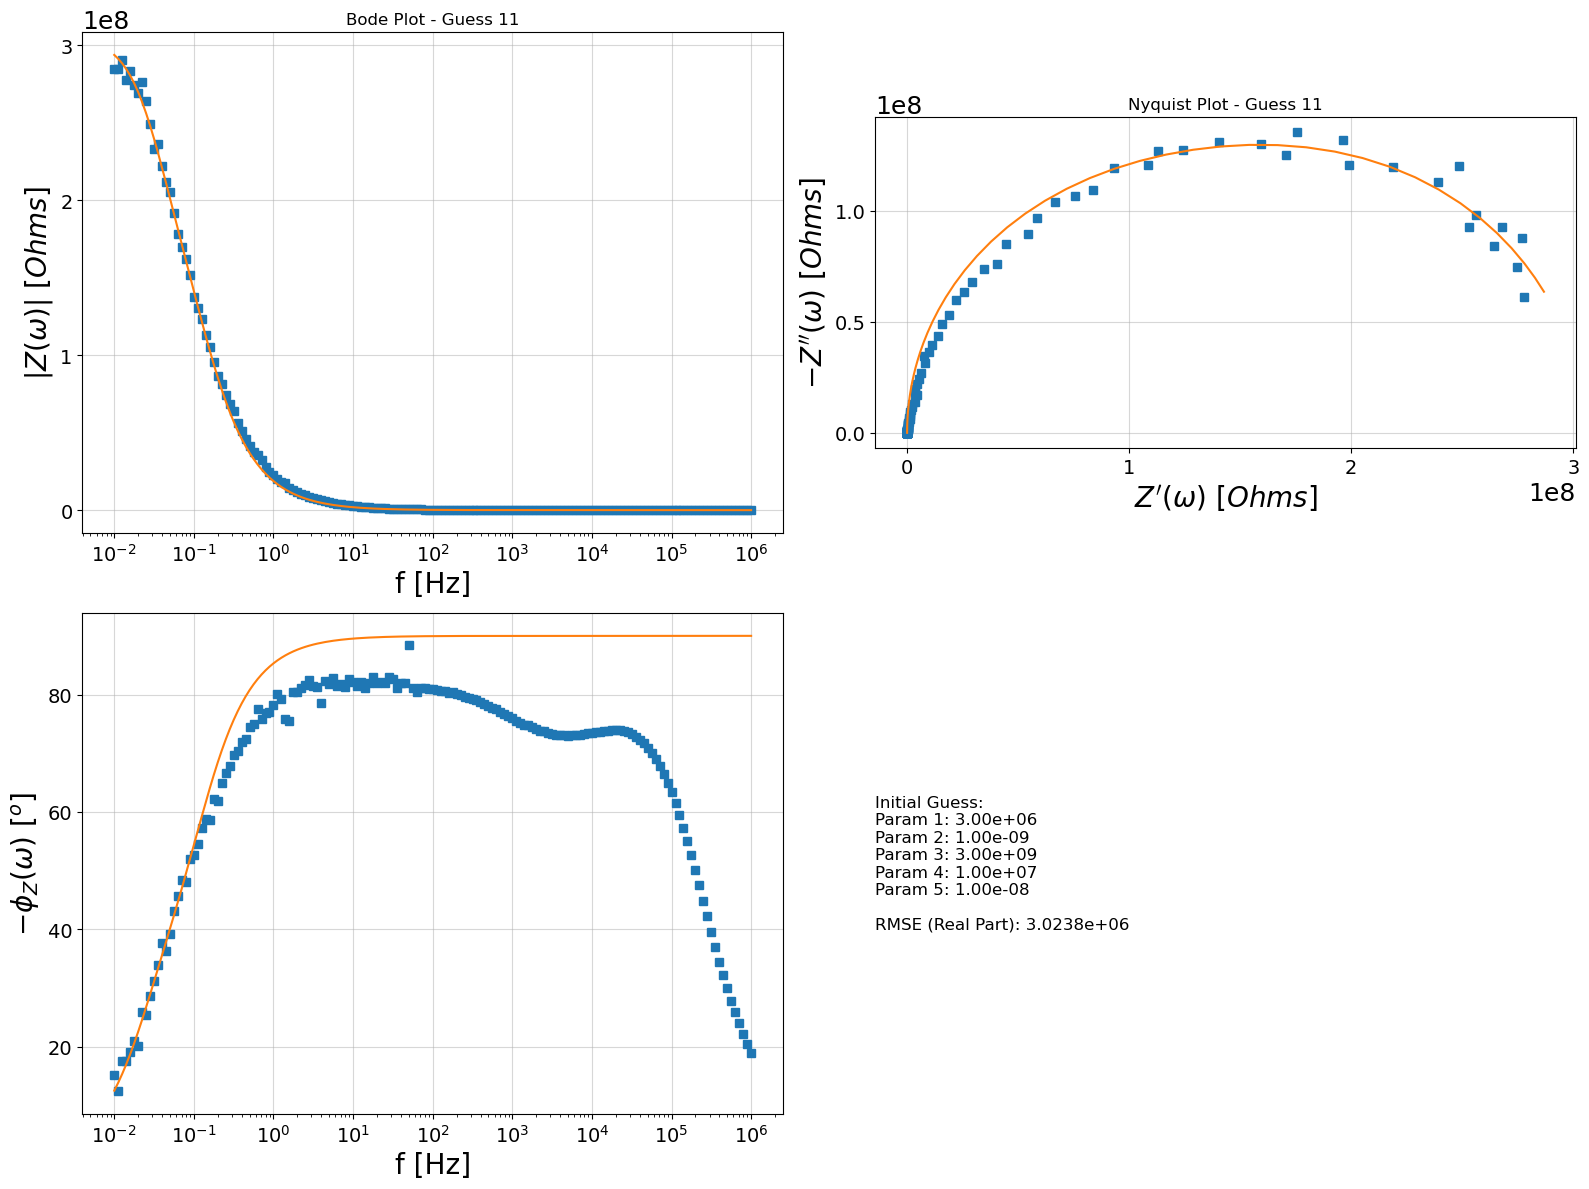

Fitting with initial guess [3000000.0, 1e-09, 3000000000.0, 100000000.0, 1e-08]


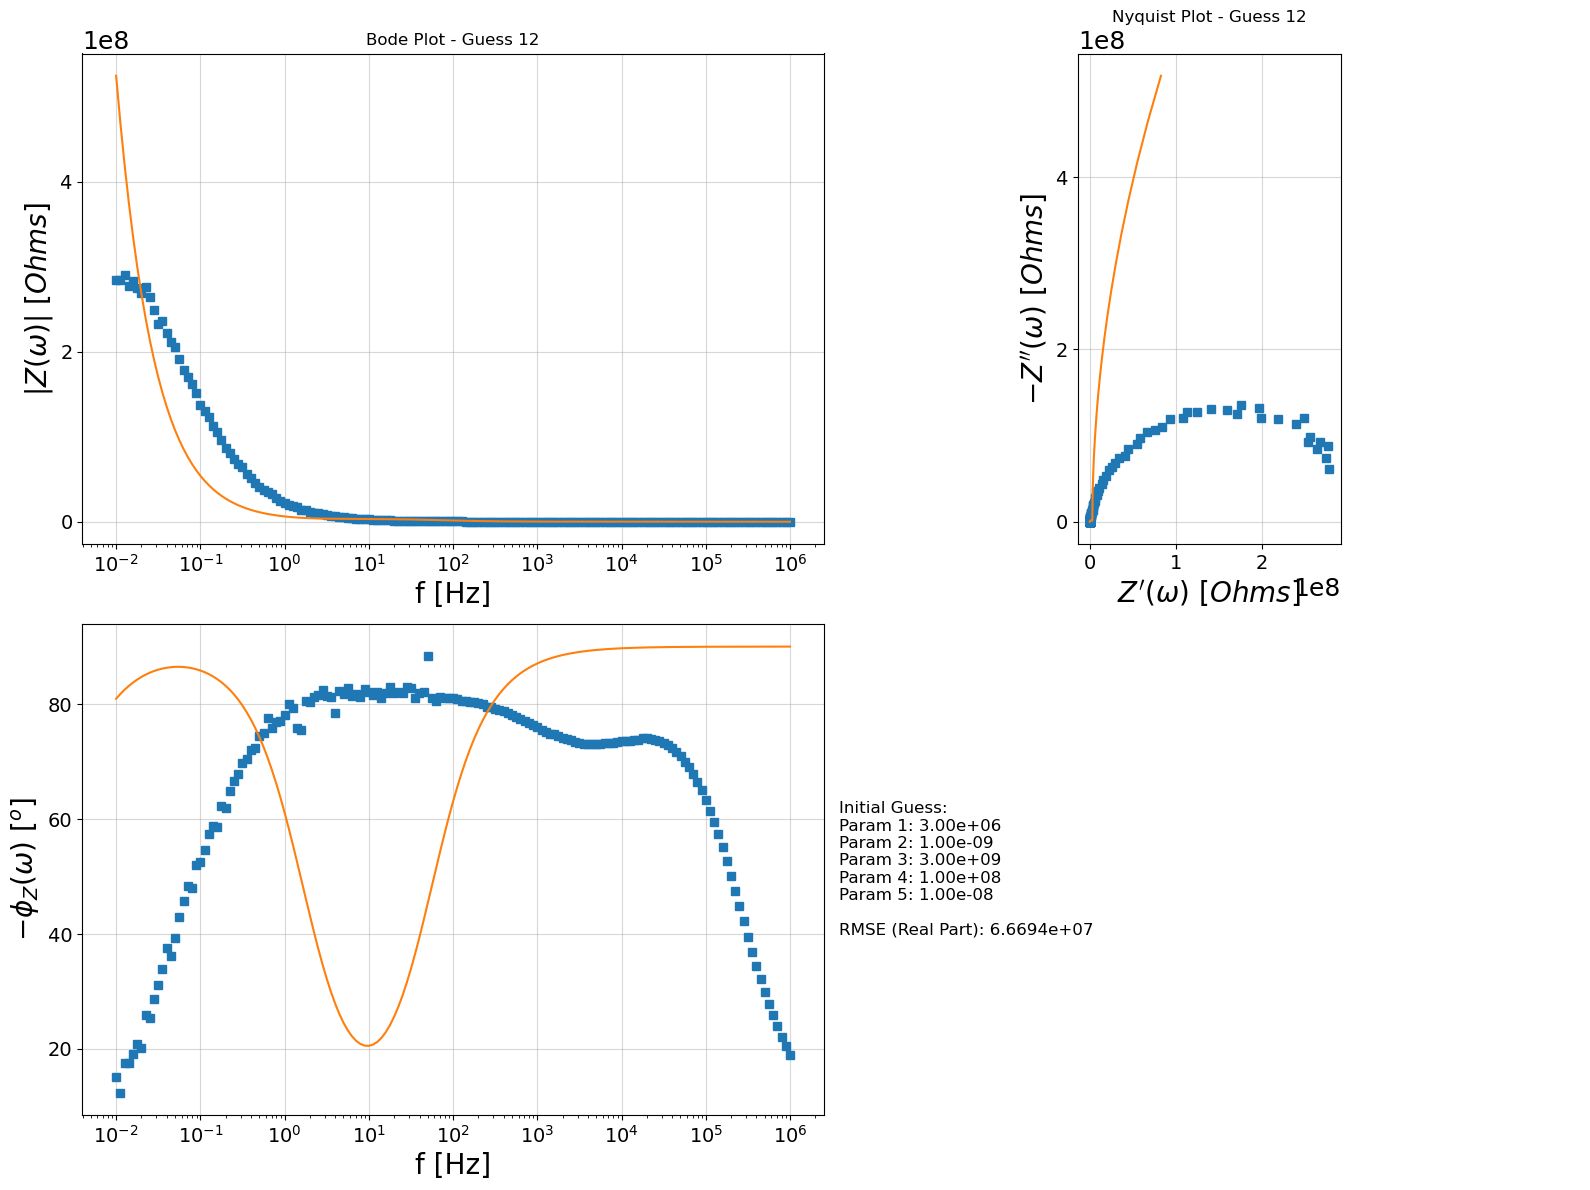

Fitting with initial guess [3000000.0, 1e-09, 3000000000.0, 10000000.0, 1e-10]


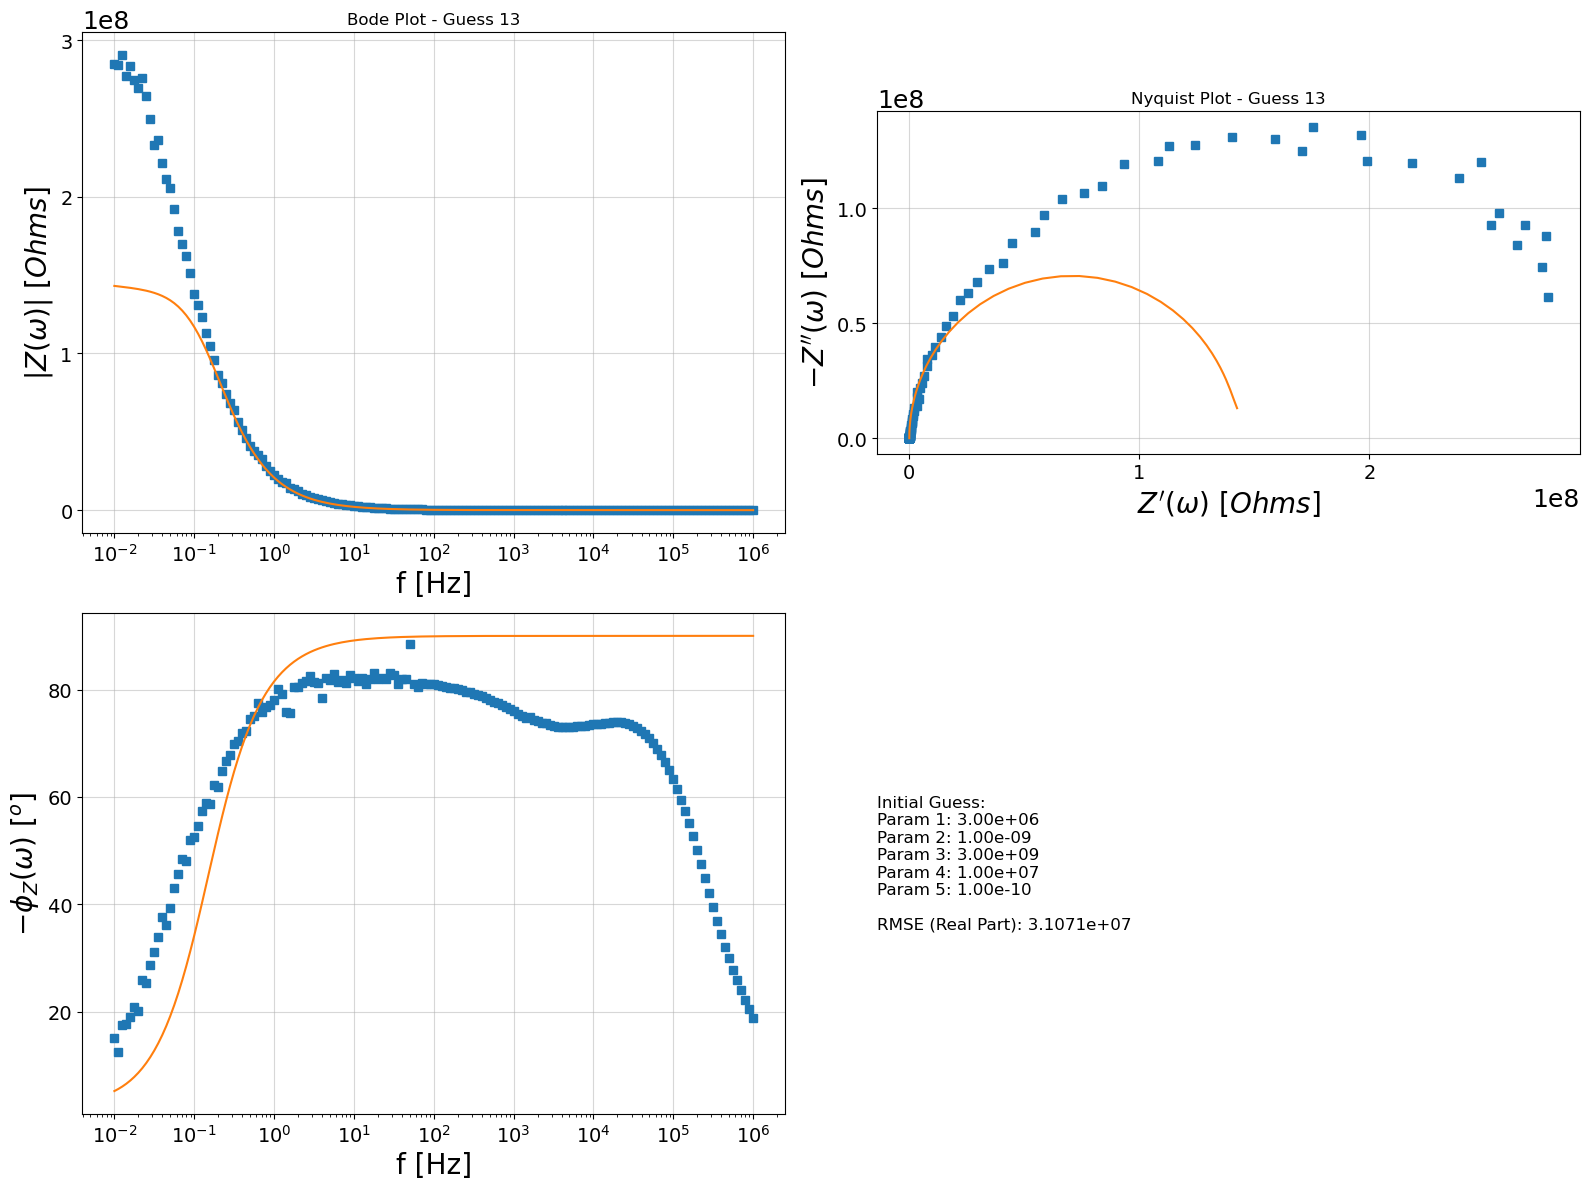

Fitting with initial guess [3000000.0, 1e-09, 3000000000.0, 10000000.0, 1e-08]


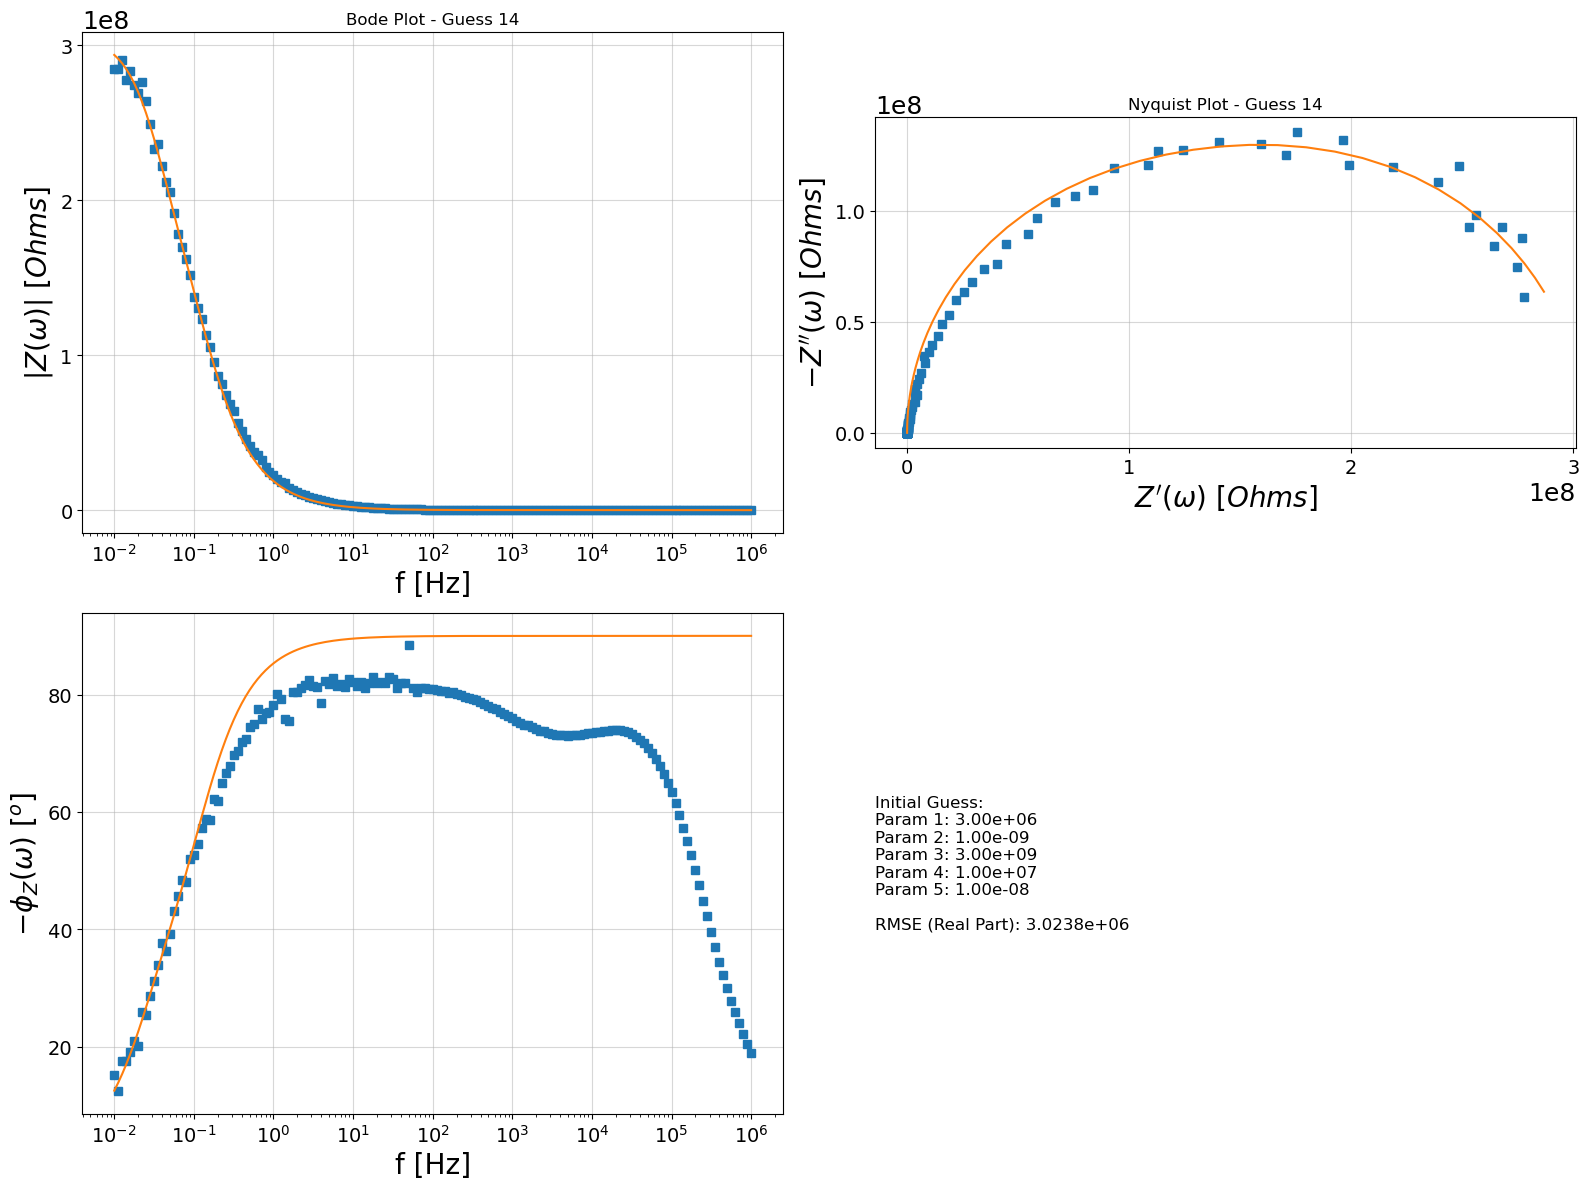

Fitting with initial guess [3000000.0, 1e-09, 3000000000.0, 10000000.0, 1e-07]


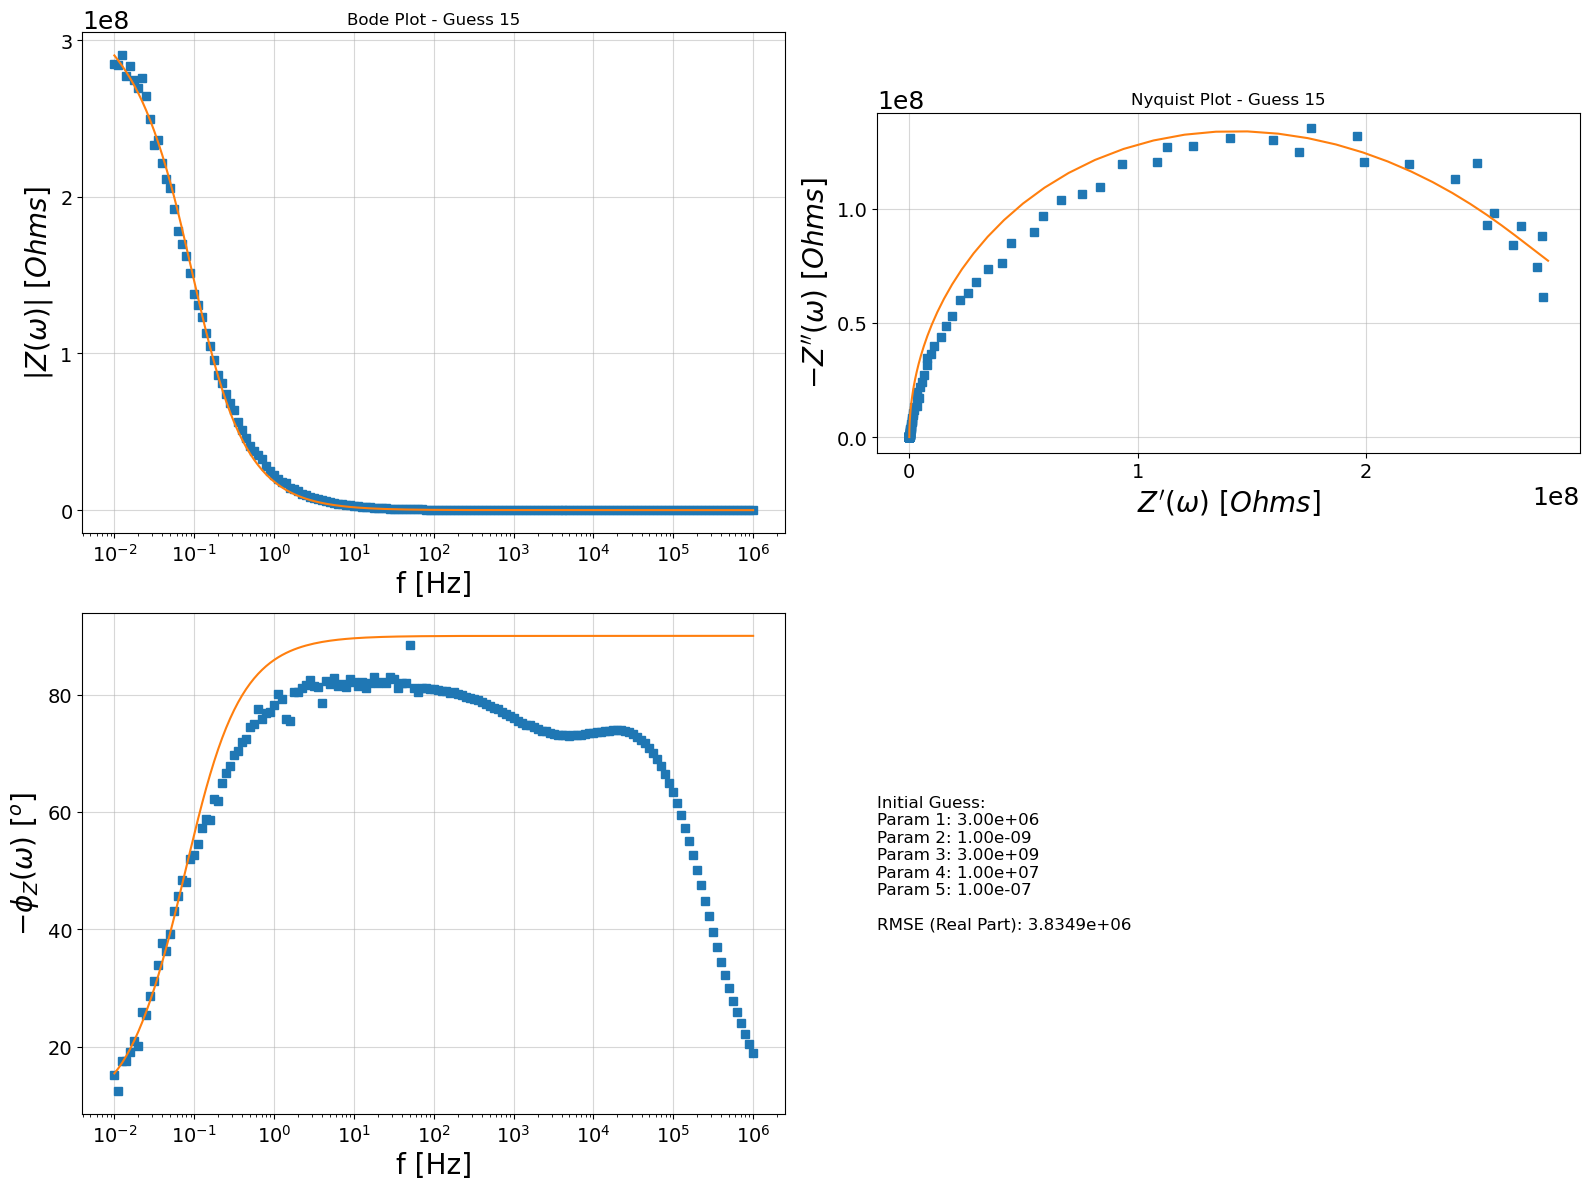

In [301]:
import matplotlib.pyplot as plt
from impedance.models.circuits import CustomCircuit
import numpy as np

# RMSE calculation function
def rmse(predicted, actual):
    return np.sqrt(np.mean((predicted - actual) ** 2))

# Loop through all combinations and fit the model
for idx, guess in enumerate(parameter_combinations):
    print(f"Fitting with initial guess {guess}")

    # Create and fit the model
    circuit = CustomCircuit(circuit=circuit_str, initial_guess=guess)
    circuit.fit(frequencies, Z)
    Z_fit = circuit.predict(frequencies)

    # Calculate RMSE (real part)
    error = rmse(Z_fit.real, Z.real)

    # Create side-by-side plots (3 subplots: 2 for Bode, 1 for Nyquist, 1 for info)
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

    # Ensure axes is a 2D array
    if not isinstance(axes, np.ndarray):
        axes = np.array(axes)

    # Bode plot (magnitude and phase on the left)
    circuit.plot(f_data=frequencies, Z_data=Z, kind='bode', ax=axes[:, 0])
    axes[0, 0].set_title(f'Bode Plot - Guess {idx + 1}')

    # Nyquist plot (on the right, top)
    circuit.plot(f_data=frequencies, Z_data=Z, kind='nyquist', ax=axes[0, 1])
    axes[0, 1].set_title(f'Nyquist Plot - Guess {idx + 1}')

    # Display initial guess parameters and RMSE (on the right, bottom)
    axes[1, 1].axis("off")  # Turn off axis
    info_text = f"Initial Guess:\n" + "\n".join(
        [f"Param {i + 1}: {val:.2e}" for i, val in enumerate(guess)]
    )
    info_text += f"\n\nRMSE (Real Part): {error:.4e}"
    axes[1, 1].text(0, 0.5, info_text, fontsize=12, verticalalignment="center")

    plt.tight_layout()
    plt.show()
